In [1]:
# Автоматическая перезагрузка модулей при изменении
# Позволяет обновлять код в helper.py, plots.py, nlp.py без перезапуска ядра
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from functions import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sentence_transformers import SentenceTransformer
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import get_linear_schedule_with_warmup
from transformers import DataCollatorWithPadding, get_linear_schedule_with_warmup
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier  # дерево решений
from sklearn.ensemble import RandomForestClassifier  # случайный лес
from lightgbm import LGBMClassifier  # градиентный бустинг
from helper import *
from plots import *
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer







[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dima2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dima2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
SEED=42

In [4]:
df = pd.read_csv(r"c:\Users\dima2\Downloads\Telegram Desktop\train_science.csv")
print(df.head())

       Id                                            Comment      Topic
0   0x840  A few things. You might have negative- frequen...    Biology
1   0xbf0  Is it so hard to believe that there exist part...    Physics
2  0x1dfc                                     There are bees    Biology
3   0xc7e  I'm a medication technician. And that's alot o...    Biology
4   0xbba                     Cesium is such a pretty metal.  Chemistry


In [5]:
# Фильтруем строки, где количество слов >= 10
df = df[df['Comment'].str.split().str.len() >= 10]

# Сбрасываем индексы, чтобы было аккуратно
df = df.reset_index(drop=True)


In [6]:
new_df = df.copy()
new_df['Comment'] = new_df['Comment'].astype(str).apply(clean_text)#Очистим текст от ненужным символов и приведём к нижнему регистру

In [7]:
#Разделим данные на треин валидацию и тест
X = df['Comment']
y = df['Topic']

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.5, stratify=y_tmp, random_state=SEED
)

print(len(X_train), len(X_val), len(X_test))

3804 815 816


In [8]:
#Разделим данные на треин валидацию и тест
X_new = new_df['Comment']
y_new = new_df['Topic']

X_train_new, X_tmp_new, y_train_new, y_tmp_new = train_test_split(
    X_new, y_new, test_size=0.3, stratify=y_new, random_state=SEED
)
X_val_new, X_test_new, y_val_new, y_test_new = train_test_split(
    X_tmp_new, y_tmp_new, test_size=0.5, stratify=y_tmp_new, random_state=SEED
)

print(len(X_train), len(X_val), len(X_test))

3804 815 816


In [9]:
models = [
    ('DummyClassifier', DummyClassifier(random_state=SEED, strategy='most_frequent')),
    ('LogisticRegression', LogisticRegression(random_state=SEED, max_iter=1000, solver='liblinear')),
    ('LinearSVC', LinearSVC(random_state=SEED)),
    ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=SEED, max_depth=4)),
    ('RandomForestClassifier', RandomForestClassifier(random_state=SEED)),
    ('CatBoostClassifier', CatBoostClassifier(random_state=SEED, verbose=0))
]

In [10]:
count_vectorizer_preprocessor = Pipeline([
    ('vec', CountVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)),
    ('fs', SelectKBest(chi2, k=5000)),  # оставляем 5000 лучших токенов(чтобы модель не учитывала слова которые встречаются везде и не имеют отношения к конкретному контексту)
])

c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

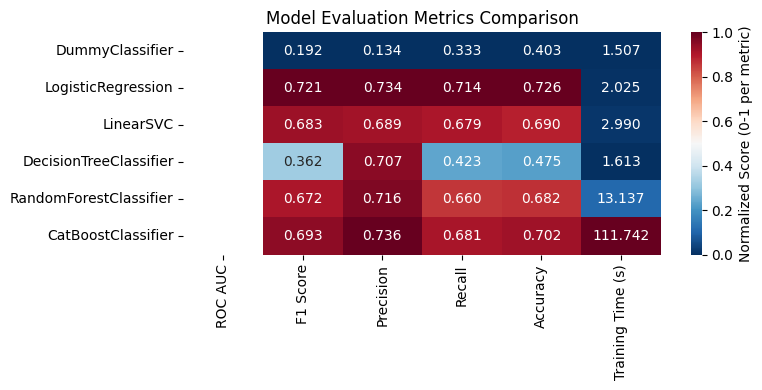

In [11]:
count_vectorizer_metrics = train_evaluate_models_cv_s(
    models=models,
    X=X,
    y=y,
    preprocessor=count_vectorizer_preprocessor,
    cv=5,
    seed=SEED, 
    plot_feature_importance=False
)

c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

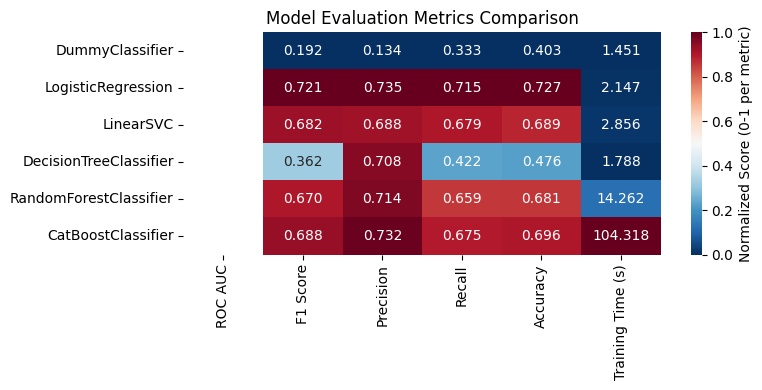

In [13]:
count_vectorizer_metrics_new = train_evaluate_models_cv_s(
    models=models,
    X=X_new,
    y=y_new,
    preprocessor=count_vectorizer_preprocessor,
    cv=5,
    seed=SEED, 
    plot_feature_importance=False
)

In [14]:
comparison_diff = compare_model_results_simple(
    count_vectorizer_metrics,
    count_vectorizer_metrics_new
)

print(comparison_diff)


                        F1 Score  Precision  Recall  Accuracy
model                                                        
DummyClassifier            0.000      0.000   0.000     0.000
LogisticRegression         0.000      0.001   0.000     0.001
LinearSVC                 -0.001     -0.001  -0.001    -0.001
DecisionTreeClassifier     0.000      0.001  -0.001     0.000
RandomForestClassifier    -0.002     -0.002  -0.001    -0.001
CatBoostClassifier        -0.006     -0.004  -0.006    -0.006


In [27]:
count_vectorizer_preprocessor_1000 = Pipeline([
    ('vec', CountVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)),
    ('fs', SelectKBest(chi2, k=1000)),  # оставляем 5000 лучших токенов(чтобы модель не учитывала слова которые встречаются везде и не имеют отношения к конкретному контексту)
])

c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

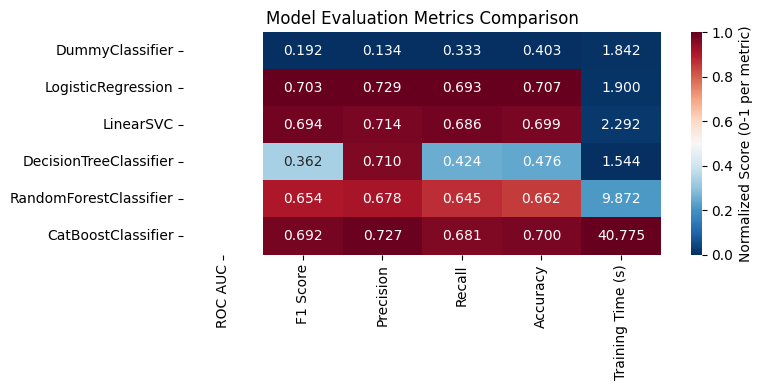

In [28]:
count_vectorizer_metrics_1000 = train_evaluate_models_cv_s(
    models=models,
    X=X,
    y=y,
    preprocessor=count_vectorizer_preprocessor_1000,
    cv=5,
    seed=SEED, 
    plot_feature_importance=False
)

In [29]:
comparison_diff = compare_model_results_simple(
    count_vectorizer_metrics,
    count_vectorizer_metrics_1000
)

print(comparison_diff)


                        F1 Score  Precision  Recall  Accuracy
model                                                        
DummyClassifier            0.000      0.000   0.000     0.000
LogisticRegression        -0.018     -0.005  -0.022    -0.019
LinearSVC                  0.011      0.026   0.007     0.009
DecisionTreeClassifier    -0.000      0.003   0.000     0.001
RandomForestClassifier    -0.018     -0.039  -0.015    -0.020
CatBoostClassifier        -0.001     -0.009  -0.000    -0.002


In [30]:

TfidfVectorizer_preprocessor = Pipeline([
   ('vec', TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)),
    ('fs', SelectKBest(chi2, k=5000)),  # оставляем 5000 лучших токенов(чтобы модель не учитывала слова которые встречаются везде и не имеют отношения к конкретному контексту)
])

c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

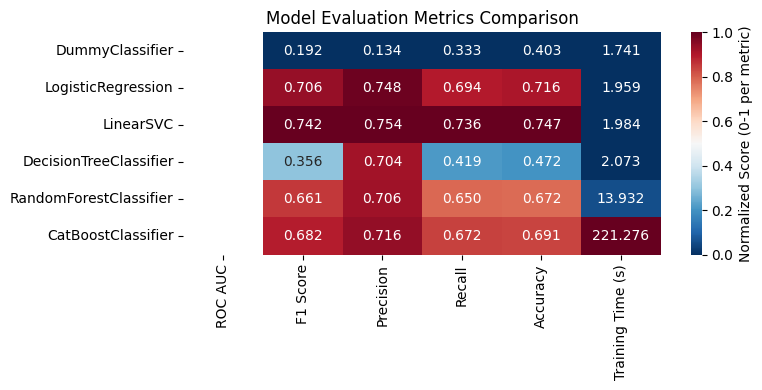

In [31]:
TfidfVectorizer_metrics = train_evaluate_models_cv_s(
    models=models,
    X=X,
    y=y,
    preprocessor=TfidfVectorizer_preprocessor,
    cv=5,
    seed=SEED, 
    plot_feature_importance=False
)

In [32]:
comparison_diff = compare_model_results_simple(
    count_vectorizer_metrics,
    TfidfVectorizer_metrics
)

print(comparison_diff)


                        F1 Score  Precision  Recall  Accuracy
model                                                        
DummyClassifier            0.000      0.000   0.000     0.000
LogisticRegression        -0.015      0.014  -0.021    -0.010
LinearSVC                  0.059      0.065   0.056     0.057
DecisionTreeClassifier    -0.006     -0.002  -0.005    -0.003
RandomForestClassifier    -0.011     -0.010  -0.010    -0.010
CatBoostClassifier        -0.011     -0.020  -0.009    -0.010


c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\dima2\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is depr

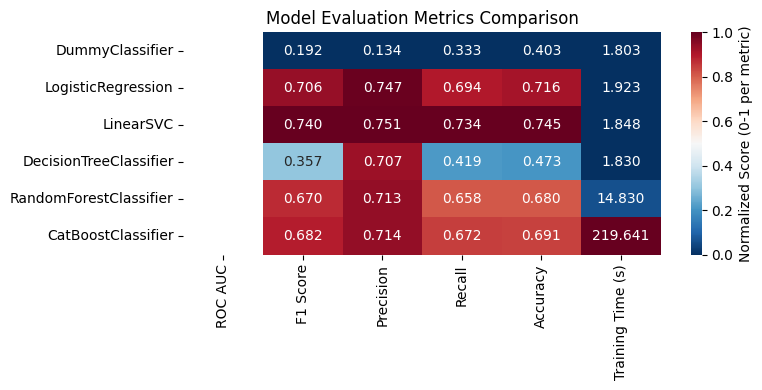

In [33]:
TfidfVectorizer_metrics_new = train_evaluate_models_cv_s(
    models=models,
    X=X_new,
    y=y_new,
    preprocessor=TfidfVectorizer_preprocessor,
    cv=5,
    seed=SEED, 
    plot_feature_importance=False
)

In [34]:
comparison_diff = compare_model_results_simple(
    count_vectorizer_metrics,
    TfidfVectorizer_metrics_new
)

print(comparison_diff)


                        F1 Score  Precision  Recall  Accuracy
model                                                        
DummyClassifier            0.000      0.000   0.000     0.000
LogisticRegression        -0.015      0.013  -0.021    -0.010
LinearSVC                  0.057      0.062   0.055     0.055
DecisionTreeClassifier    -0.005     -0.000  -0.005    -0.003
RandomForestClassifier    -0.002     -0.004  -0.002    -0.002
CatBoostClassifier        -0.011     -0.022  -0.009    -0.010


In [35]:
comparison_diff = compare_model_results_simple(
    TfidfVectorizer_metrics,
    TfidfVectorizer_metrics_new
)

print(comparison_diff)


                        F1 Score  Precision  Recall  Accuracy
model                                                        
DummyClassifier            0.000      0.000   0.000     0.000
LogisticRegression        -0.000     -0.001   0.000     0.000
LinearSVC                 -0.002     -0.003  -0.002    -0.002
DecisionTreeClassifier     0.002      0.002  -0.000     0.001
RandomForestClassifier     0.009      0.006   0.008     0.008
CatBoostClassifier        -0.000     -0.001  -0.000    -0.000
